# Fire and Tree Mortality Database

From the METADATA:
To construct our FTM database, the lead authors (Cansler, Hood, Varner, van Mantgem) conducted a literature search for publications reporting post-fire tree mortality data and contacted corresponding authors to inquire if they were willing to contribute to database. To collect additional data, we also posted data requests on listservs, professional management and science exchange networks, and with technical working groups. Lastly, we coordinated with the National Park Service to receive the agency’s fire ecology program fire effects monitoring data. From these data requests and searches, we obtained 41 contributed databases from researchers, managers, and archived datasets that met our criteria (see Completeness Report).



### Advantages of this Dataset
Everything has burned

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")

In [103]:
FTM_fires = pd.read_csv('../Data/FTM_DB/Data/FTM_fires.csv')

In [105]:
print(FTM_fires.columns)
len(FTM_fires)

Index(['YrFireName', 'Fire', 'Dataset', 'N', 'yr_fire', 'Latitude',
       'Longitude', 'Elevation', 'month_fire', 'day_fire', 'Fire_type',
       'State', 'Sample_design', 'Plot_size_ha', 'Threshold_diameter_cm',
       'Study_purpose', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19'],
      dtype='object')


427

In [106]:
print(min(FTM_fires['yr_fire']), max(FTM_fires['yr_fire']))

1981 2016


In [108]:
FTM_trees = pd.read_csv('../Data/FTM_DB/Data/FTM_trees.csv')

/var/folders/mm/t_p68_6506v3jg0m1f58zkv40000gn/T/ipykernel_39604/350864764.py:1: DtypeWarning:

Columns (4,5,6,7,10,62,63) have mixed types. Specify dtype option on import or set low_memory=False.



In [109]:
print(len(FTM_trees))
print(FTM_trees.columns)
FTM_trees['Times_burned'].info()

171177
Index(['YrFireName', 'Species', 'Dataset', 'Times_burned', 'ID', 'Plot',
       'TreeNum', 'Unit', 'Genus', 'Species_name', 'Subspecies',
       'Genus_species', 'DBH_cm', 'DRC_cm', 'HT_m', 'HCB_pre', 'CR_pre', 'CC',
       'VR', 'CL_m', 'yr0status', 'yr1status', 'yr2status', 'yr3status',
       'yr4status', 'yr5status', 'yr6status', 'yr7status', 'yr8status',
       'yr9status', 'yr10status', 'HCB_post', 'CR_post', 'CSH_m', 'CLS_m',
       'CLK_m', 'CLS_percent', 'CLK_percent', 'CVS_percent', 'CVK_percent',
       'CVC_percent', 'CBS', 'BCHA_m', 'BCHM_m', 'BCH_percent', 'BCA', 'CKR',
       'GCA', 'GIR_percent', 'DMR', 'BTL', 'AB', 'DFB', 'FEN', 'IPS', 'MPB',
       'RPB', 'RTB', 'SB', 'WPB', 'WB', 'SPB', 'CVS_percent_source',
       'CVK_percent_source'],
      dtype='object')
<class 'pandas.core.series.Series'>
RangeIndex: 171177 entries, 0 to 171176
Series name: Times_burned
Non-Null Count   Dtype
--------------   -----
171177 non-null  int64
dtypes: int64(1)
memory usage: 1.

Lots of trees...
When did they burn?

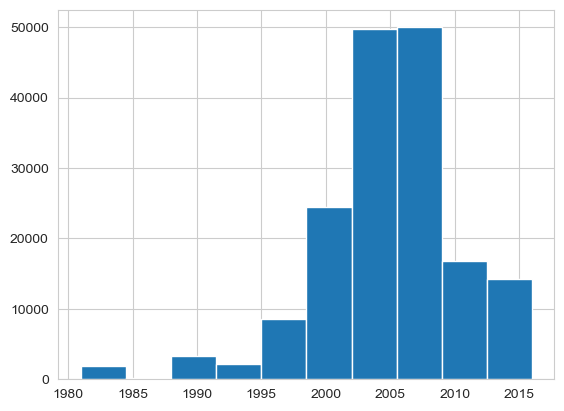

In [118]:
FTM_trees['YrFire'] = FTM_trees['YrFireName'].str[:4].astype(int)
plt.hist(FTM_trees['YrFire'])
plt.show()

Where were the fires? \
Note that the FTM_fires dataset has Latitude and Longitude.  
Lets use the 'YrFireName' to correlate trees in FTM_trees to their Latitude and Longitude.  

In [142]:
lat_map = FTM_fires.set_index('YrFireName')['Latitude'].to_dict()
lon_map = FTM_fires.set_index('YrFireName')['Longitude'].to_dict()


FTM_trees['FIRELAT'] = FTM_trees['YrFireName'].map(lat_map)
FTM_trees['FIRELON'] = FTM_trees['YrFireName'].map(lon_map)

fig = px.scatter_mapbox(FTM_trees, lat='FIRELAT', lon='FIRELON',zoom=2,mapbox_style="open-street-map")

fig.update_traces(marker = dict(size = 2))

fig.update_layout(
    mapbox_center={"lat": 41.9, "lon": -93.0},  # Center on IOWA
)

fig.show()



In [150]:
#FTM_trees[FTM_trees['YrFireName']== '2008 - New Fork']
#FTM_trees[FTM_trees['YrFireName']== '2006 - Tripod']


This dataset could be good for post fire effects.  
Seems like we'd like to also look at pre fire information about the areas aswell.  \
How to connect the two? \
Maybe use a different fire dataset to get the shapes of the fires and then look at data inside those regions, taken before the fire... 

I just found the New Fork fire (2008 - New Fork) here: https://data-nifc.opendata.arcgis.com/datasets/nifc::historic-perimeters-combined-2000-2018-geomac/explore?filters=eyJmaXJleWVhciI6WzIwMDcsMjAwOF19&location=43.030122%2C-109.519336%2C9.40

\
Showing its shape

\
Found a couple other fires in this historical fire database. 

Lets narrow our view to just WA

In [151]:
FTM_trees_WA = FTM_trees[FTM_trees['YrFireName'].isin(FTM_fires[FTM_fires['State'] == 'Washington']['YrFireName'])]